In [25]:
import torch
import torch.nn as nn

import torch.utils.data.dataloader
import torchvision
import torchsummary

import matplotlib.pyplot as plt
import ipywidgets


from fastprogress.fastprogress import master_bar, progress_bar

In [2]:
batch_size = 64

In [3]:
transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
    ]
)

dataset = torchvision.datasets.MNIST("~/pytorch/data", train=True, transform=transforms)
data_loader = torch.utils.data.dataloader.DataLoader(dataset, shuffle=True, batch_size=batch_size)

In [4]:
data_iter = iter(data_loader)
data_x, data_y = next(data_iter)
print(torch.max(data_x), torch.min(data_x))

tensor(1.) tensor(0.)


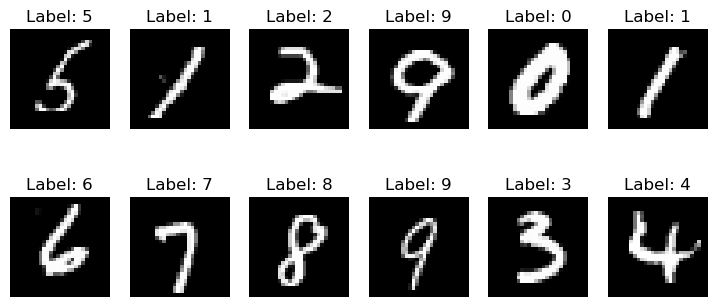

In [5]:
num_col = 6
num_row = 2

_, axs = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i, ax in enumerate(axs.flatten()):
    img = data_x[i].squeeze()
    ax.set_title(f"Label: {data_y[i].item()}")
    ax.imshow(img, cmap="grey")
    ax.set_axis_off()

plt.show()

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 196),
            nn.ReLU(),
            nn.Linear(196, 49),
            nn.ReLU(),
            nn.Linear(49, 12),
            nn.ReLU(),
            nn.Linear(12, 6),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            nn.ReLU(),
            nn.Linear(12, 49),
            nn.ReLU(),
            nn.Linear(49, 196),
            nn.ReLU(),
            nn.Linear(196, 784),
            nn.Unflatten(-1, (1, 28, 28))
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [7]:
model = Autoencoder()
torchsummary.summary(model, input_size=data_x[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 196]         153,860
              ReLU-3                  [-1, 196]               0
            Linear-4                   [-1, 49]           9,653
              ReLU-5                   [-1, 49]               0
            Linear-6                   [-1, 12]             600
              ReLU-7                   [-1, 12]               0
            Linear-8                    [-1, 6]              78
              ReLU-9                    [-1, 6]               0
           Linear-10                   [-1, 12]              84
             ReLU-11                   [-1, 12]               0
           Linear-12                   [-1, 49]             637
             ReLU-13                   [-1, 49]               0
           Linear-14                  [

In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = torch.nn.MSELoss()

epochs = 20
for epoch in (mb := master_bar(range(epochs))):
    for (bach_of_data_images, _) in (pb := progress_bar(data_loader, parent=mb)):
        true_images = bach_of_data_images
        predicted = model(true_images)

        loss = loss_function(predicted, true_images)
        pb.comment = f"Loss: {loss.item()}"
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

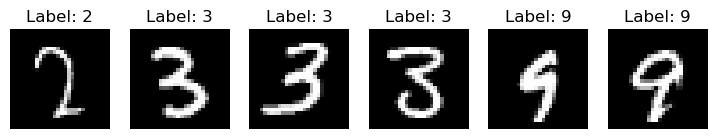

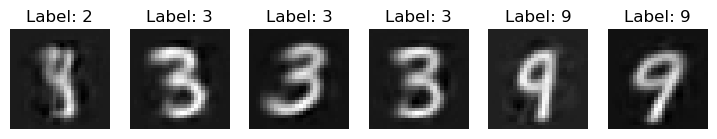

In [24]:
data_iter = iter(data_loader)
data_x, data_y = next(data_iter)

num_col = 6
num_row = 1

def plot_images(data_x):
    _, axs = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
    for i, ax in enumerate(axs.flatten()):
        img = data_x[i].squeeze()
        ax.set_title(f"Label: {data_y[i].item()}")
        ax.imshow(img, cmap="grey")
        ax.set_axis_off()

    plt.show()

plot_images(data_x)
plot_images(model(data_x).detach().numpy())

In [69]:
data_iter = iter(data_loader)
data_x, data_y = next(data_iter)
encoded = model.encoder(data_x)
print(torch.max(encoded), torch.min(encoded))
# Max ~ 13.5
# Min = 0

torch.Size([64, 6])
tensor(12.1005, grad_fn=<MaxBackward1>) tensor(0., grad_fn=<MinBackward1>)


This is the place where you can play with the model!

In [74]:
eir = encoded_ipywidget_range = (0, 13.5, 0.1)

def update(E0, E1, E2, E3, E4, E5):
    encoded = torch.tensor([E0, E1, E2, E3, E4, E5]).reshape(1, 6)
    decoded_image = model.decoder(encoded)
    plt.imshow(decoded_image.detach().numpy()[0][0], cmap="grey")


ipywidgets.interact(update, E0=eir, E1=eir, E2=eir, E3=eir, E4=eir, E5=eir)

interactive(children=(FloatSlider(value=6.7, description='E0', max=13.5), FloatSlider(value=6.7, description='…

<function __main__.update(E0, E1, E2, E3, E4, E5)>